# **EDA Project by Truman Fritz**

In [51]:
# Importing key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as ms

# Setting up personal configurations
pd.set_option('display.max_columns', None)

In [87]:
# Read CSV as DataFrame, print first 5 rows
df = pd.read_csv('hour.csv')

In [88]:
# Print shape and information about the frame
print(df.head())
print(df.shape)

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
(17379, 17)


In [90]:
drop_features = {"instant", "dteday"}
df = df.drop(columns=drop_features)
print(df.head())

  season yr mnth hr holiday weekday workingday weathersit  temp   atemp   hum  \
0      1  0    1  0       0       6          0          1  0.24  0.2879  0.81   
1      1  0    1  1       0       6          0          1  0.22  0.2727  0.80   
2      1  0    1  2       0       6          0          1  0.22  0.2727  0.80   
3      1  0    1  3       0       6          0          1  0.24  0.2879  0.75   
4      1  0    1  4       0       6          0          1  0.24  0.2879  0.75   

   windspeed  casual  registered  cnt  
0        0.0       3          13   16  
1        0.0       8          32   40  
2        0.0       5          27   32  
3        0.0       3          10   13  
4        0.0       0           1    1  


In [ ]:
df.dtypes

In [91]:
categorical_features = {"season", "yr", "mnth", "holiday", "hr", "workingday", "weekday", "weathersit"}
for feature in categorical_features:
    df[feature] = df[feature].astype("category")
    
df.dtypes

season        category
yr            category
mnth          category
hr            category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


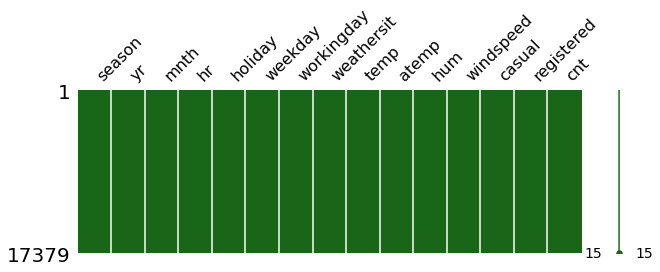

In [92]:
print(df.isnull().sum())
ms.matrix(df,figsize=(10,3),color =(0.1, 0.4, 0.1))
plt.show()

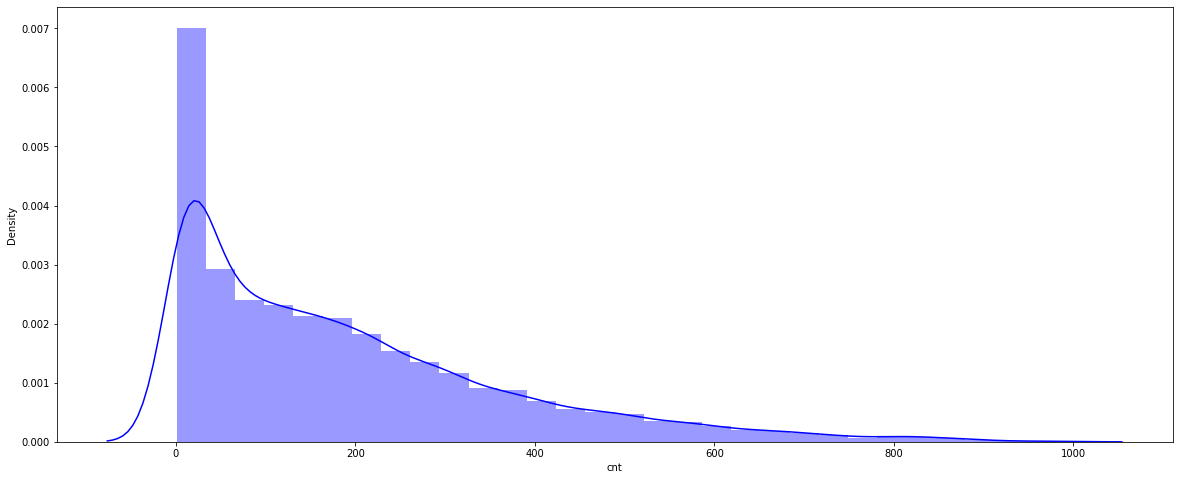

In [93]:
plt.figure(figsize=(20, 8))
sb.distplot(df['cnt'],color='b',bins=30,hist_kws={'alpha':0.4});

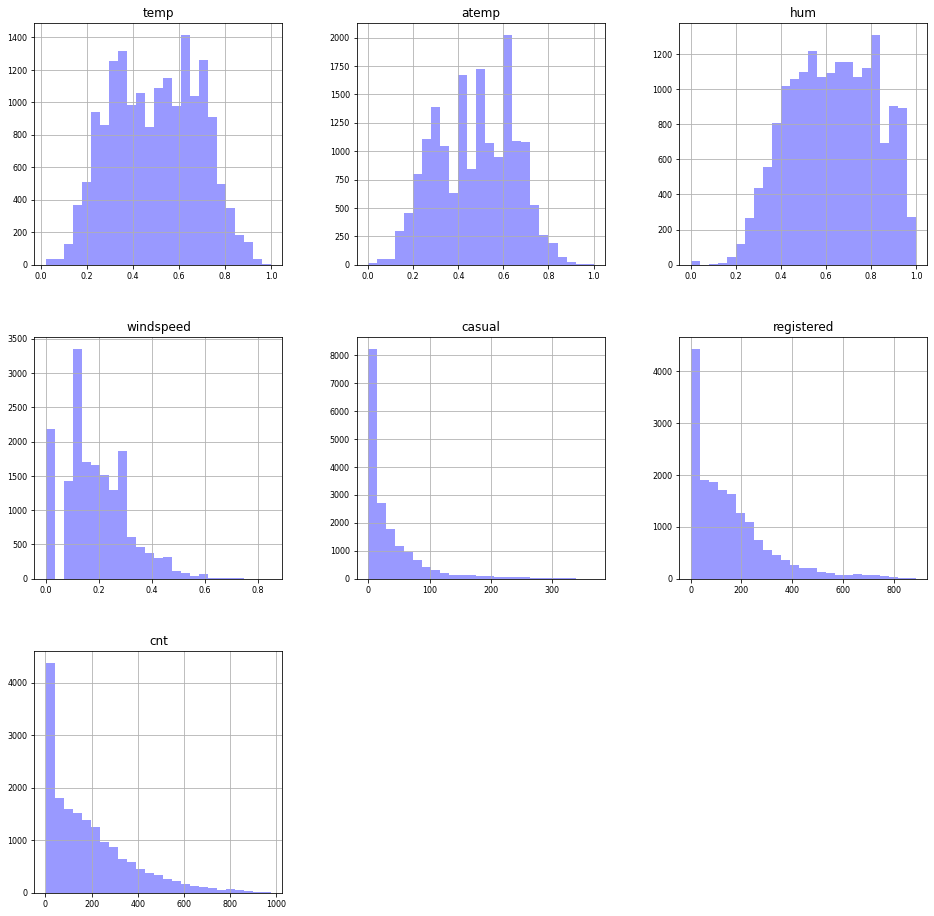

In [84]:
df_num = df.select_dtypes(include=['float64','int64'])
df_num.hist(figsize=(16,16),bins=25,xlabelsize=8,ylabelsize=8,color='B',alpha=0.4)
plt.show()

In [78]:
print(df.describe())

               temp         atemp           hum     windspeed        casual  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.496987      0.475775      0.627229      0.190098     35.676218   
std        0.192556      0.171850      0.192930      0.122340     49.305030   
min        0.020000      0.000000      0.000000      0.000000      0.000000   
25%        0.340000      0.333300      0.480000      0.104500      4.000000   
50%        0.500000      0.484800      0.630000      0.194000     17.000000   
75%        0.660000      0.621200      0.780000      0.253700     48.000000   
max        1.000000      1.000000      1.000000      0.850700    367.000000   

         registered           cnt  
count  17379.000000  17379.000000  
mean     153.786869    189.463088  
std      151.357286    181.387599  
min        0.000000      1.000000  
25%       34.000000     40.000000  
50%      115.000000    142.000000  
75%      220.000000    281.000000  


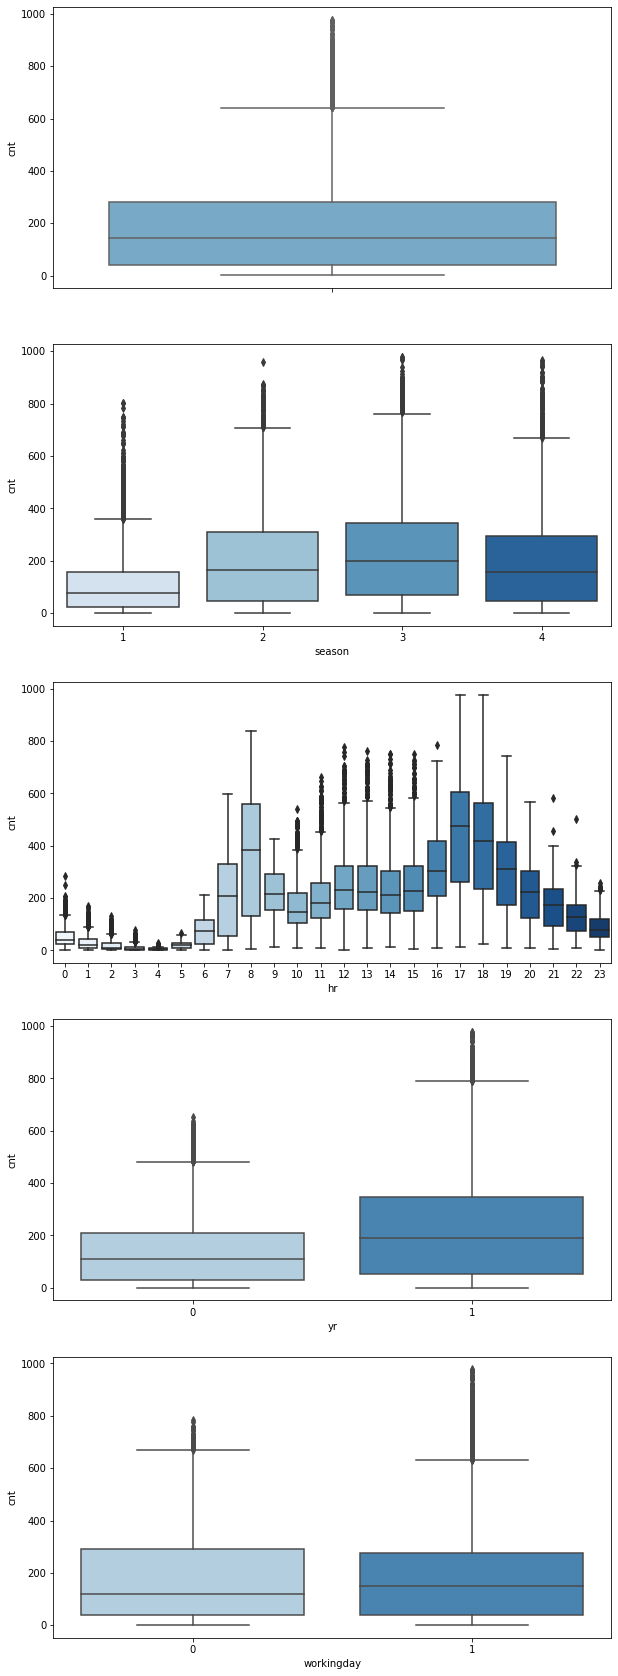

In [82]:
fig, axes = plt.subplots(nrows=5,ncols=1)
fig.set_size_inches(10, 30)
sb.boxplot(data=df,y='cnt',orient="v",ax=axes[0], palette="Blues")
sb.boxplot(data=df,y="cnt",x="season",orient="v",ax=axes[1], palette="Blues")
sb.boxplot(data=df,y="cnt",x="hr",orient="v",ax=axes[2], palette="Blues")
sb.boxplot(data=df,y="cnt",x="yr",orient="v",ax=axes[3], palette="Blues")
sb.boxplot(data=df,y="cnt",x="workingday",orient="v",ax=axes[4], palette="Blues")
plt.show()

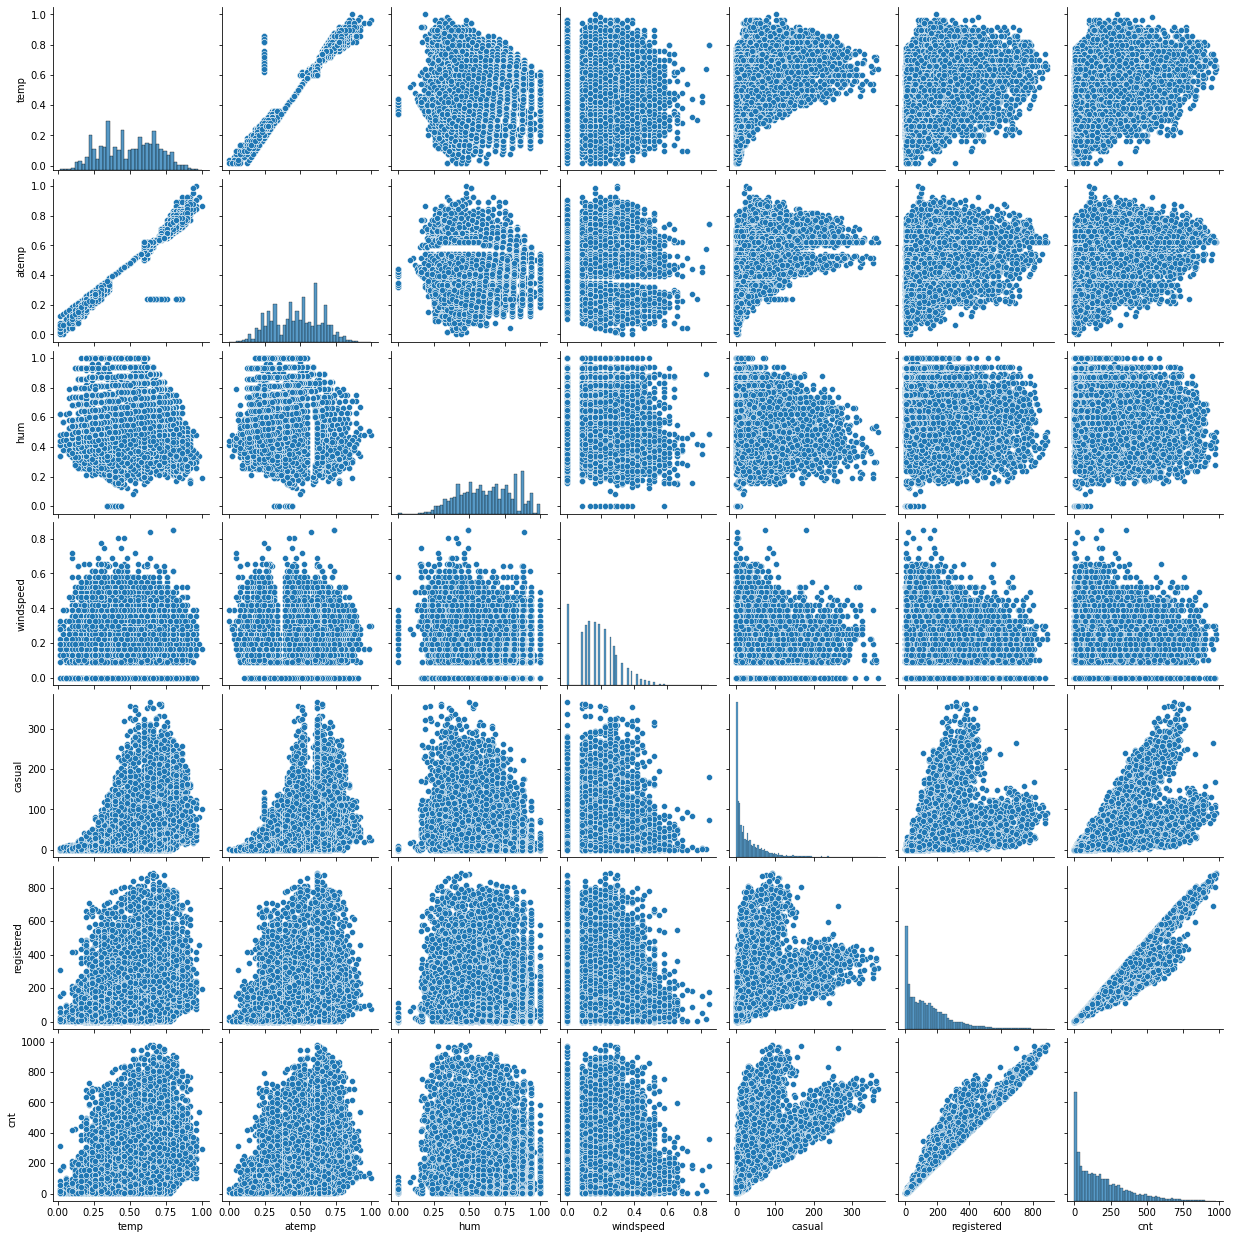

In [94]:
sb.pairplot(df)

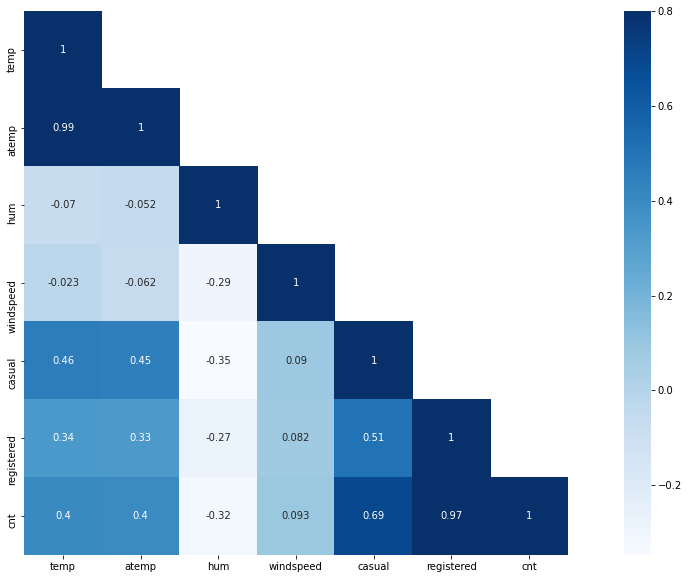

In [83]:
corrMatt = df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sb.heatmap(corrMatt,cmap="Blues",mask=mask,vmax=.8,square=True,annot=True)